In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df['sepal_length'].value_counts()

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

([<matplotlib.patches.Wedge at 0x7a290df66170>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0999999999999954, -1.0298943258065002e-07, ''),
  Text(0.5500001486524352, -0.9526278583383436, '')])

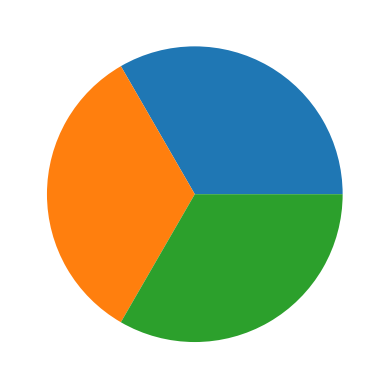

In [ ]:
plt.pie(df['species'].value_counts())

<Axes: >

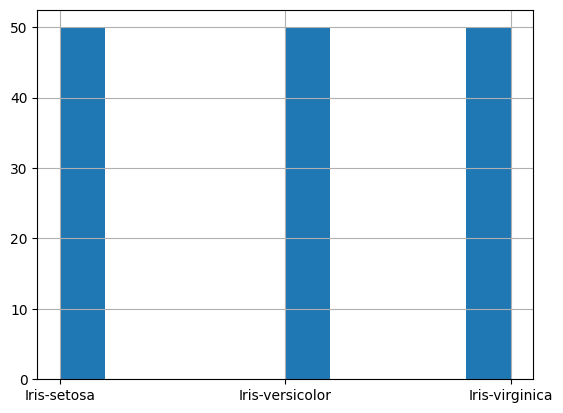

In [ ]:
df['species'].hist()

## **`Exploratory Data Analysis`**

<Axes: >

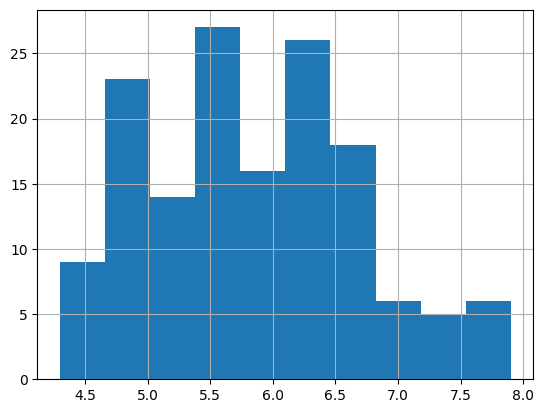

In [ ]:
df['sepal_length'].hist()

<Axes: >

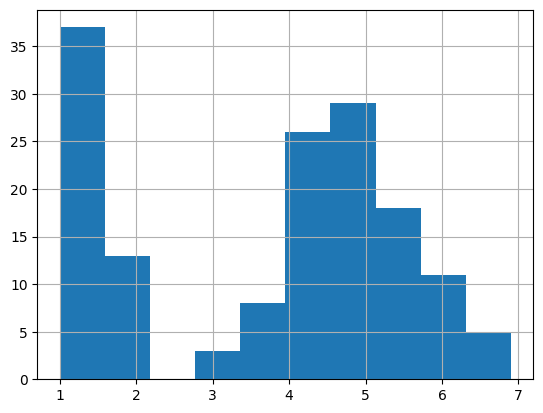

In [ ]:
df['petal_length'].hist()

<Axes: >

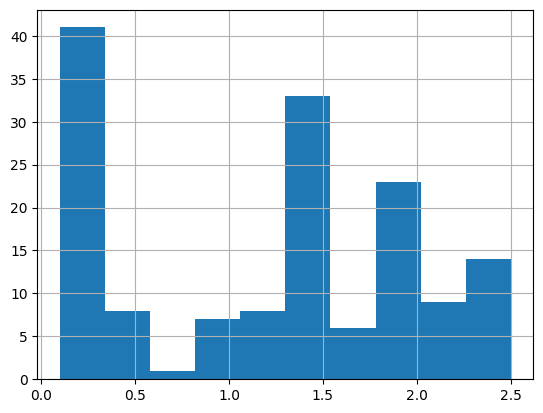

In [ ]:
df['petal_width'].hist()

<Axes: >

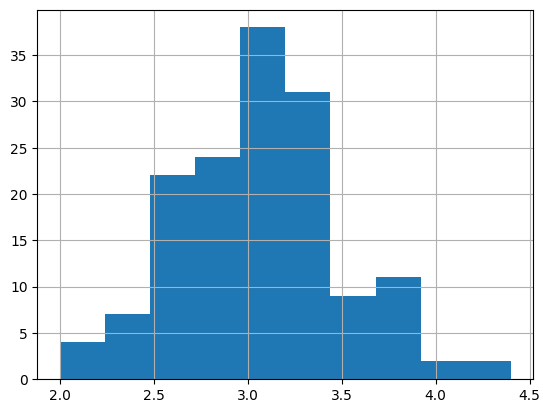

In [ ]:
df['sepal_width'].hist()

In [5]:
colors = ['red','blue','green']
Species = ["Iris-setosa","Iris-versicolor","Iris-virginica"]


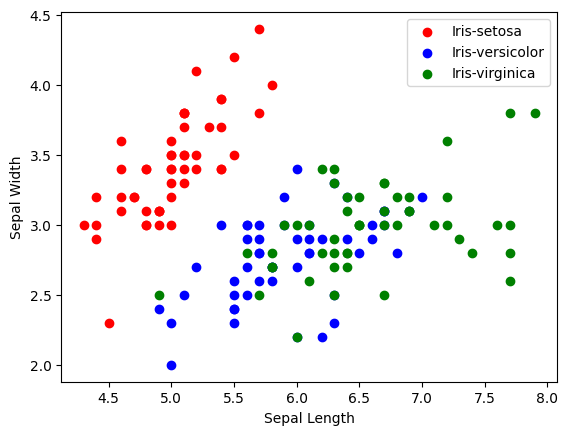

In [6]:
for i in range(3):
  x = df[df['species'] == Species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = Species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()

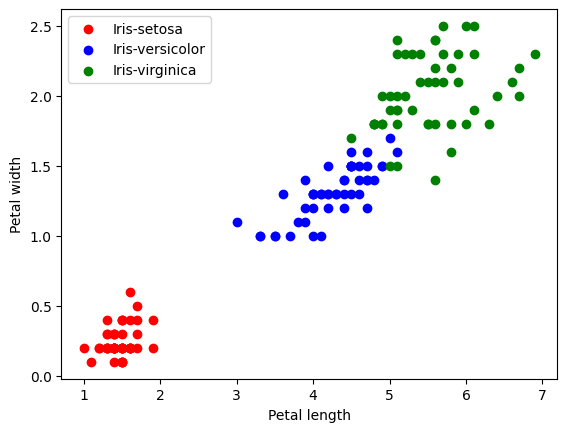

In [ ]:
for i in range(3):
  x = df[df['species'] == Species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = Species[i])
  plt.xlabel('Petal length')
  plt.ylabel('Petal width')
  plt.legend()

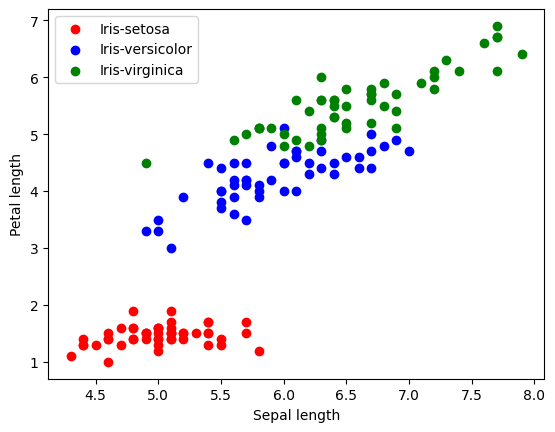

In [ ]:
for i in range(3):
  x = df[df['species'] == Species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = Species[i])
  plt.xlabel('Sepal length')
  plt.ylabel('Petal length')
  plt.legend()

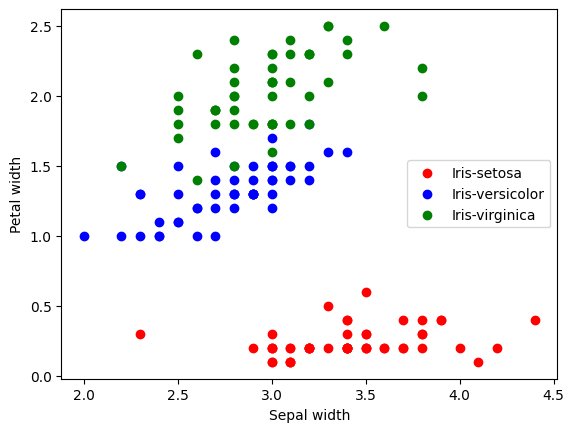

In [ ]:
for i in range(3):
  x = df[df['species'] == Species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = Species[i])
  plt.xlabel('Sepal width')
  plt.ylabel('Petal width')
  plt.legend()

In [7]:
m_df = df.select_dtypes(include=[np.number])
corrr = m_df.corr()

In [8]:
n_df  = df.select_dtypes(include = [np.chararray])
print(n_df.head(5))

       species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


<Axes: >

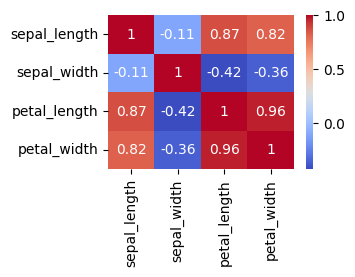

In [9]:
fig, ax = plt.subplots(figsize = (3,2))
sns.heatmap(corrr, annot = True, ax = ax, cmap = "coolwarm")

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)


In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# print matrix to get performance of the model
print("Accuracy", model.score(x_test, y_test)*100)

Accuracy 97.77777777777777


In [ ]:
# k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
modell = KNeighborsClassifier()


In [ ]:
modell.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# print matrix to get performance of the model
print("Accuracy", modell.score(x_test, y_test)* 100)

Accuracy 97.77777777777777


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
modelll = DecisionTreeClassifier()

In [ ]:
modelll.fit(x_train, y_train)
print("Accuracy", modelll.score(x_test, y_test)* 100)

Accuracy 97.77777777777777


In [14]:
import pickle
model_path = 'iris_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [15]:

sepal_len = float(input("Enter sepal length "))
sepal_wid = float(input("Enter sepal width "))
petal_len = float(input("Enter petal length "))
petal_wid = float(input("Enter petal width"))

# Store the values in a list
user_inputs = [sepal_len, sepal_wid, petal_len, petal_wid]

# Convert the list to a NumPy array
flower_details = np.array(user_inputs).reshape(1, -1)


# Print the NumPy array
print("The sepal and petal length and width is : ", flower_details)

predictions = model.predict(flower_details)

Enter sepal length 5.1
Enter sepal width 6.3
Enter petal length 1.2
Enter petal width3.2
The sepal and petal length and width is :  [[5.1 6.3 1.2 3.2]]


In [16]:


# Determine the species name
species_names = ['iris-setosa', 'iris-versicolor', 'iris-virginica']
predicted_species = species_names[predictions[0]]

# Print the prediction
print("Predicted species:", predicted_species)

Predicted species: iris-setosa


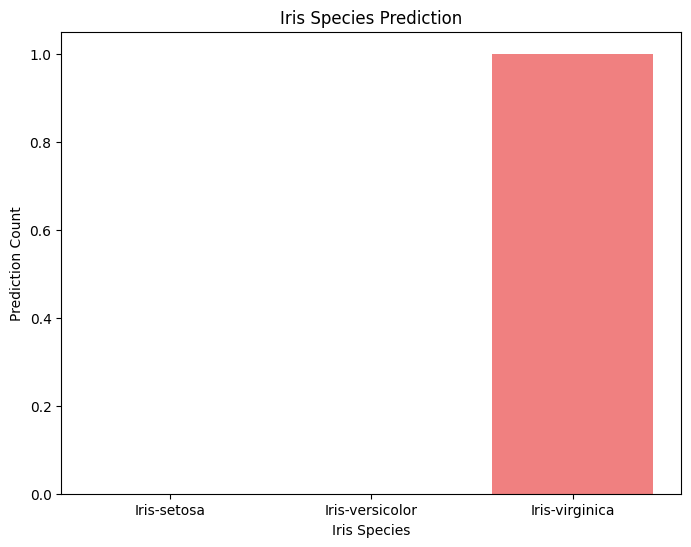

In [ ]:
if predictions == 0 :
  x = [1,0,0]

elif predictions == 1:
  x = [0,1,0]

elif predictions == 2:
   x = [0,0,1]

y = ["Iris-setosa", "Iris-versicolor", "Iris-virginica" ]
plt.figure(figsize=(8, 6))
plt.bar(y, x , color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Iris Species Prediction')
plt.xlabel('Iris Species')
plt.ylabel('Prediction Count')
plt.show()
